Image shape: (256, 256, 4)


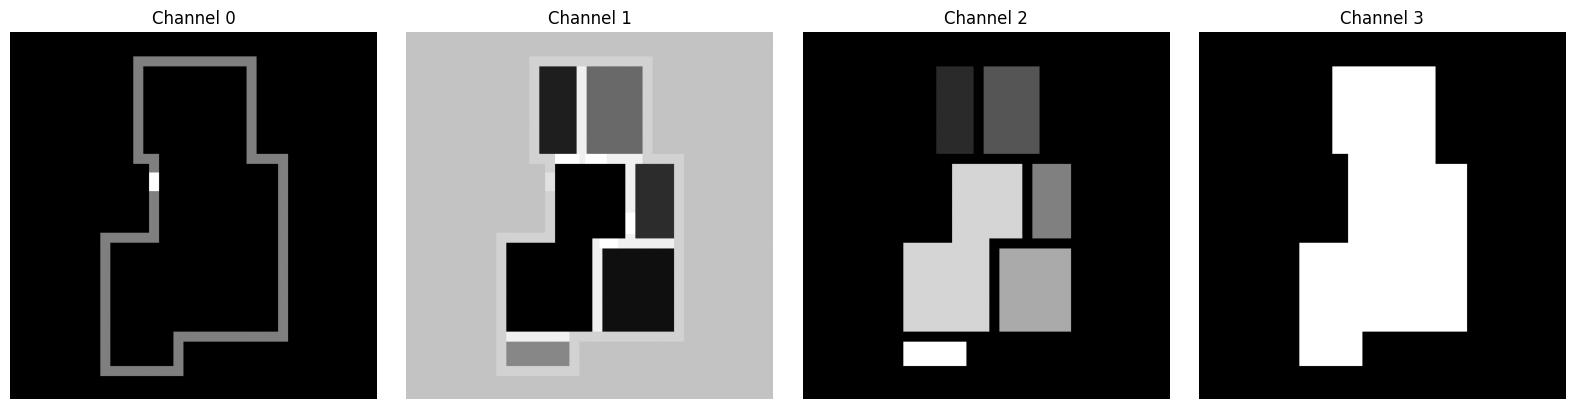

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

# Path to your 4-channel PNG
img_path = "./raw_data/floorplan_dataset/8.png"

# Read image (skimage keeps all channels, even alpha)
img = io.imread(img_path)

print("Image shape:", img.shape)   # should be (H, W, 4)

# Split channels
ch0 = img[:,:,0]   # channel 0
ch1 = img[:,:,1]   # channel 1
ch2 = img[:,:,2]   # channel 2
ch3 = img[:,:,3]   # channel 3

# Plot each channel
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(ch0, cmap="gray")
axes[0].set_title("Channel 0")
axes[1].imshow(ch1, cmap="gray")
axes[1].set_title("Channel 1")
axes[2].imshow(ch2, cmap="gray")
axes[2].set_title("Channel 2")
axes[3].imshow(ch3, cmap="gray")
axes[3].set_title("Channel 3")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [125]:
np.set_printoptions(threshold=np.inf)  # disable summarization

print(ch0)
np.set_printoptions()  # resets to default summarization


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import importlib
import RPLAN_Toolbox.rplan.floorplan as floorplan
import RPLAN_Toolbox.rplan.align as align
import RPLAN_Toolbox.rplan.measure as measure



importlib.reload(floorplan)   # forces reload from disk
importlib.reload(align)   # forces reload from disk
importlib.reload(measure)   # forces reload from disk



from RPLAN_Toolbox.rplan.floorplan import Floorplan
from RPLAN_Toolbox.rplan.align import align_fp_gt
from RPLAN_Toolbox.rplan.decorate import get_dw
from RPLAN_Toolbox.rplan.measure import compute_tf
from RPLAN_Toolbox.rplan.plot import get_figure,get_axes,plot_category,plot_boundary,plot_graph,plot_fp,plot_tf

In [99]:
def plot_extracted_data(data, title):
    # Setup plot
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot boxes
    for i, box in enumerate(data['boxes']):
        y0, x0, y1, x1 = box
        rect = Rectangle((x0, y0), x1-x0, y1-y0, fill=False, edgecolor='blue', linewidth=2)
        ax.add_patch(rect)
        ax.text((x0+x1)/2, (y0+y1)/2, str(i), color='blue', fontsize=10, ha='center')

    # Plot boundary (polyline)
    boundary = data['boundary']
    boundary_plot = np.append(data['boundary'], [data['boundary'][0]], axis=0)
    ax.plot(boundary_plot[:,1], boundary_plot[:,0], '-o', color='black')
    for i, (r, c, d, f) in enumerate(boundary):
        ax.text(c, r, str(i), color='red', fontsize=8)

    # Plot edges between boxes
    for edge in data['edges']:
        i, j, etype = edge
        box_i = data['boxes'][i]
        box_j = data['boxes'][j]
        # get centers
        ci = ((box_i[1]+box_i[3])/2, (box_i[0]+box_i[2])/2)
        cj = ((box_j[1]+box_j[3])/2, (box_j[0]+box_j[2])/2)
        ax.plot([ci[0], cj[0]], [ci[1], cj[1]], '--', color='green')
        ax.text((ci[0]+cj[0])/2, (ci[1]+cj[1])/2, str(etype), color='green', fontsize=8)

    ax.set_aspect('equal')
    ax.set_title(title)
    plt.gca().invert_yaxis()  # match image coordinates
    plt.show()


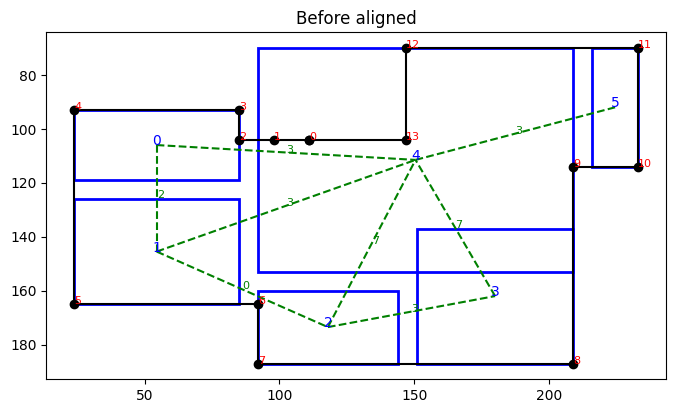

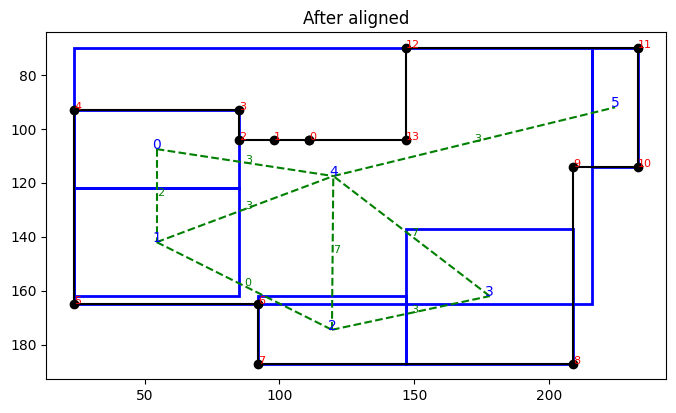

In [146]:
file_path = "./raw_data/floorplan_dataset/8.png"
fp = Floorplan(file_path)
data = fp.to_dict()

plot_extracted_data(data, "Before aligned")
boxes_aligned, order, room_boundaries = align_fp_gt(data['boundary'],data['boxes'],data['types'],data['edges'])
data['boxes_aligned'] = boxes_aligned
data['order'] = order
data['room_boundaries'] = room_boundaries
tmp = data['boxes']
data['boxes'] = boxes_aligned
plot_extracted_data(data, "After aligned")
data['boxes'] = tmp

In [147]:
doors,windows = get_dw(data)
data['doors'] = doors
data['windows'] = windows

<Axes: >

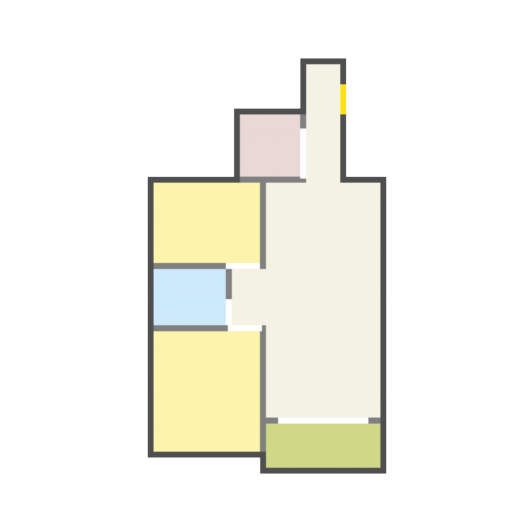

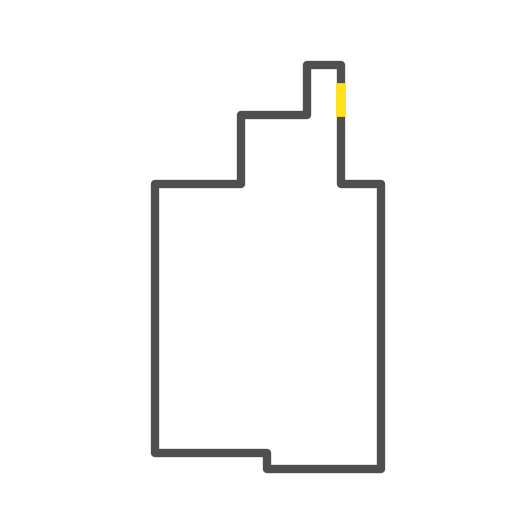

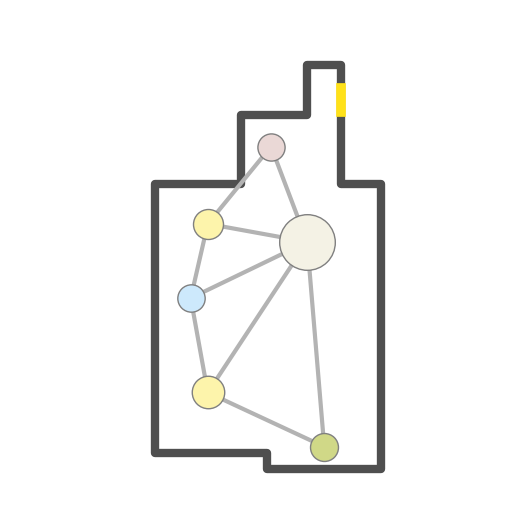

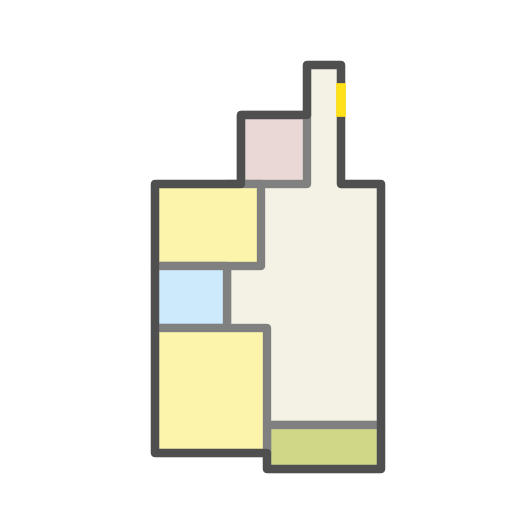

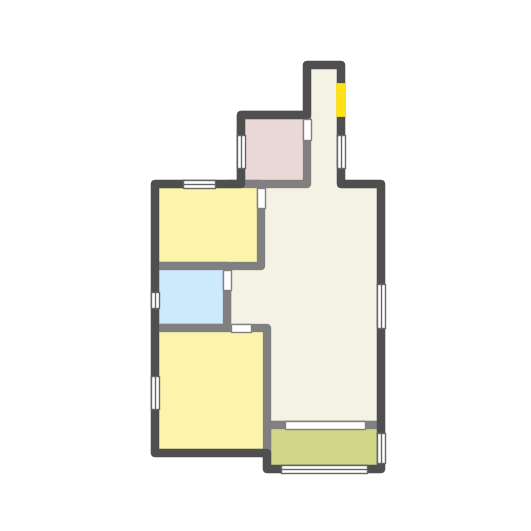

In [112]:
plot_category(fp.category) # raw image
plot_boundary(data['boundary']) # vector boundary
plot_graph(data['boundary'],data['boxes'],data['types'],data['edges']) # node graph
plot_fp(data['boundary'], data['boxes_aligned'][order], data['types'][order]) # vector floorplan
plot_fp(data['boundary'], data['boxes_aligned'][order], data['types'][order],data['doors'],data['windows']) # vector floorplan with doors and windows

In [160]:
x,y = compute_tf(data['boundary'])

[0.01928783 0.01928783 0.01632047 0.09050445 0.10682493 0.10089021
 0.03264095 0.1735905  0.10830861 0.03560831 0.0652819  0.12759644
 0.0504451  0.05341246]


<Axes: >

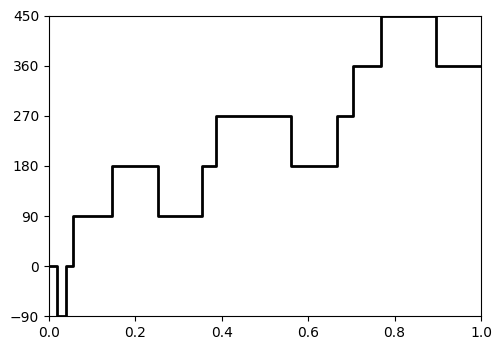

In [162]:
plot_tf(x,y)
